# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup object
soup = soup(browser.html, 'html.parser') 

In [8]:
# Extract all rows of data
table = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
# Create an empty list
rows = []

# Extract all rows from the table
for row in table.find_all('tr'):
    # Initialize an empty list to store cells for each row
    cells = []

    # Extract data from each cell in the row
    for cell in row.find_all(['td', 'th']):  # Include both 'td' and 'th' if the table has header cells
        cells.append(cell.text.strip())

    # Add the list of cells to the rows list
    rows.append(cells)

# Print the extracted data
for row in rows:
    print(row)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', 

In [12]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Extract the header row
header_row = rows[0]

# Remove the header row from the list of rows
data_rows = rows[1:]

# Create a Pandas DataFrame with the remaining rows and the extracted header
mars_data = pd.DataFrame(data_rows, columns=header_row)

# Print the DataFrame
print(mars_data)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [13]:
# Confirm DataFrame was created successfully
mars_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
data_types = mars_data.dtypes
print(data_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [16]:
# Change data types for data analysis
mars_data['terrestrial_date'] = pd.to_datetime(mars_data['terrestrial_date'])
mars_data['sol'] = mars_data['sol'].astype('int64')
mars_data['ls'] = mars_data['ls'].astype('int64')
mars_data['month'] = mars_data['month'].astype('int64')
mars_data['min_temp'] = mars_data['min_temp'].astype('float64')
mars_data['pressure'] = mars_data['pressure'].astype('float64')

In [17]:
# Confirm type changes were successful by examining data types again
data_types = mars_data.dtypes
print(data_types)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
mars_data['month'].groupby(mars_data['month']).count()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [19]:
# 2. How many Martian days' worth of data are there?
mars_data['sol'].count()

1867

In [20]:
# 3. What is the average low temperature by month?
avg_low_temp = mars_data['min_temp'].groupby(mars_data['month']).mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

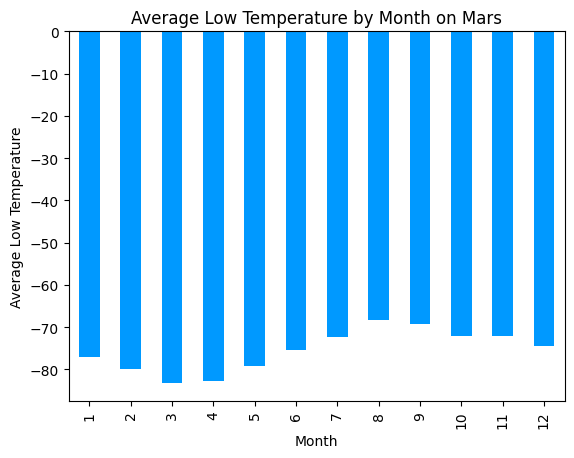

In [37]:
# Plot the average temperature by month
avg_low_temp.plot(kind='bar', color='#0099FF')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month on Mars')

# Show the plot
plt.show()

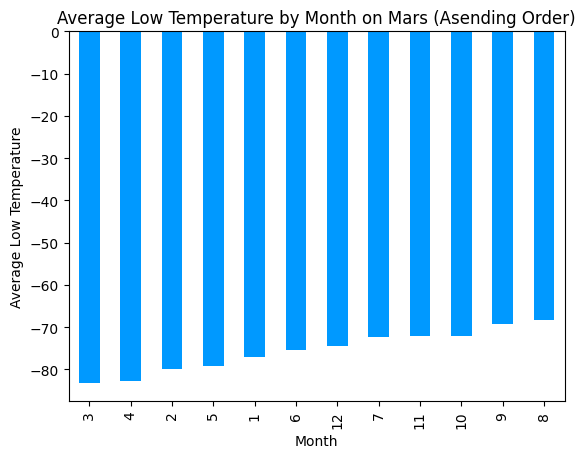

In [36]:
# Identify the coldest and hottest months in Curiosity's location
avg_low_temp_sorted = avg_low_temp.sort_values(ascending=True)

# Plot the sorted series
avg_low_temp_sorted.plot(kind='bar', color='#0099FF')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Low Temperature')
plt.title('Average Low Temperature by Month on Mars (Asending Order)')

# Show the plot
plt.show()

#### Which month, on average, has the lowest temperature? The highest? <br/>
Analysis - Of all the months the 3rd and 4th months have the lowest average temperature. The "highest" temperatures are in the 8th and 9th month.

In [25]:
# 4. Average pressure by Martian month
avg_pressure = mars_data['pressure'].groupby(mars_data['month']).mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

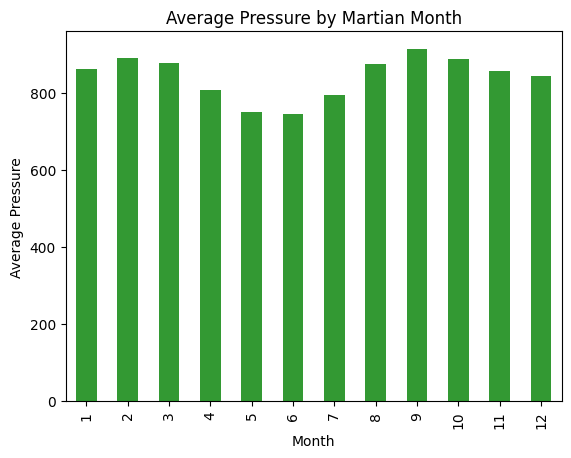

In [35]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', color='#339933')

# Set plot labels and title
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.title('Average Pressure by Martian Month')

# Show the plot
plt.show()


#### Which month, on average, has the lowest atmospheric pressure? The highest?
Analysis - Of all the months the 6th month has the lowest atmospheric pressure. The 9th month has the highest atmospheric pressure.

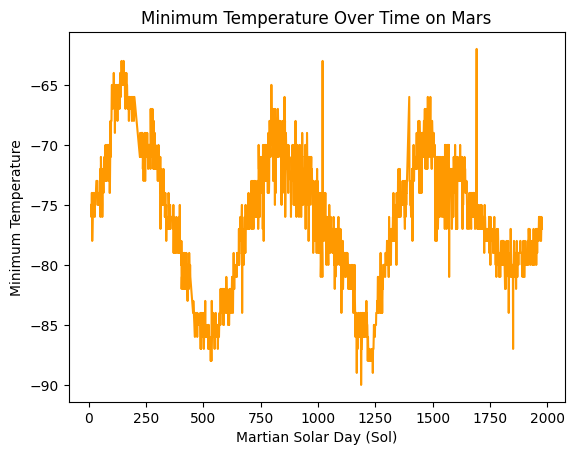

In [30]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Sort the DataFrame by 'sol' to ensure proper ordering for the line plot
mars_data_sorted = mars_data.sort_values(by='sol')

# Create a line graph
plt.plot(mars_data_sorted['sol'], mars_data_sorted['min_temp'], color='#FF9900')

# Set plot labels and title
plt.xlabel('Martian Solar Day (Sol)')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Time on Mars')

# Show the plot
plt.show()

#### How many terrestrial days exist in a Martian year?
Analysis - The average distance from peak to peak looks to be about 675 days in the plot.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
csv_filename = 'mars_data_export.csv'

# Export the DataFrame to a CSV file
mars_data.to_csv(csv_filename, index=False)

In [34]:
browser.quit()